<a href="https://colab.research.google.com/github/suneel-nelaturi/Retail_sales_prediction/blob/main/SUNEEL_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data from csv files from both datasets
Rsd_df= pd.read_csv("/content/drive/MyDrive/Rossmann Stores Data.csv")
store_df=pd.read_csv("/content/drive/MyDrive/store.csv")


In [ ]:
# Rossman Stores Data set
Rsd_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#Sores data set
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Rossman data set information
Rsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are 1017209 rows and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

In [ ]:
# Stores data set info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.shape

(1115, 10)

There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

In [ ]:
# Describing the sales dataset
Rsd_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Describing the stores dataset
store_df.describe()


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Missing Data habdling

In [ ]:
# Checking the null values
Rsd_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There is no null values in Rossman Data set

In [ ]:
# Checking the null values
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In the store_df Out of 1115 entries there are missing values for the columns:



*   CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

*  CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month  

*   CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

*   Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Text(0.5, 0, 'Competition Distance Distribution Plot')

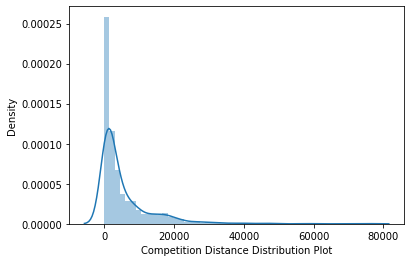

In [ ]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the right and the distribution is skewed on the right. Median is more robust to outlier effect.

In [ ]:
# filling competition distance with the median value
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 0, 'CompetitionOpenSinceMonth Distrubution plot')

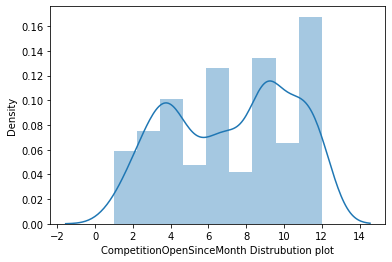

In [ ]:
#distribution plot of CompetitionOpenSinceMonth
sns.distplot(x=store_df['CompetitionOpenSinceMonth'])
plt.xlabel('CompetitionOpenSinceMonth Distrubution plot')

Since it is like categorical column. Mode is the best central tendency to impute the values in this column




In [ ]:
# filling competition open since month with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

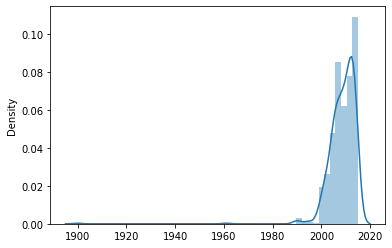

In [ ]:
#distribution plot of CompetitionOpenSinceYear
sns.distplot(x=store_df['CompetitionOpenSinceYear'])

In [ ]:
# filling competition open since year with the most occuring values of the columns
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [ ]:
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

If we check Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval columns, when Promo2 is '0' remaining columns have NaN values where Promo2 is 1 remaining columns have some values. So we can replace NaN values with 0

In [ ]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0, inplace=True)
store_df['Promo2SinceYear'].fillna(value=0, inplace=True)
store_df['PromoInterval'].fillna(value=0, inplace=True)

In [ ]:
store_df.isnull().sum()


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Merging the two Datasets


In [ ]:
#merge the two datasets on stores data
df=Rsd_df.merge(right=store_df, on="Store", how='left')

In [ ]:
#Head of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
#shape of the dataframe
df.shape

(1017209, 18)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

If we observe the dataset, Date column is in object datatype so we need to change it to Datetime.

In [ ]:
# importing datetime
from datetime import datetime as dt

In [ ]:
# Changing the datatype form string to datetime format
df['Date']=pd.to_datetime(df["Date"], format="%Y/%m/%d")
df['Date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

##Exploraray Data Analysis

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:



*   There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.

*  Customers would have a positive correlation with Sales.

*  The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

* Promotion should be having a positive correlation with Sales.

*  Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.

*  Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

In [ ]:
# Let's check DayOfWeek coloumn
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

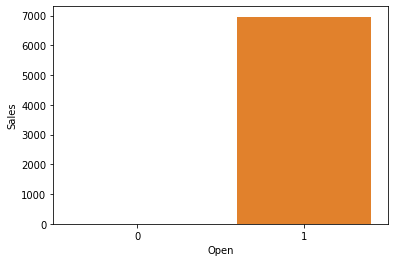

In [ ]:
# Relation  between sales and open columns
sns.barplot(x="Open", y="Sales", data=df)


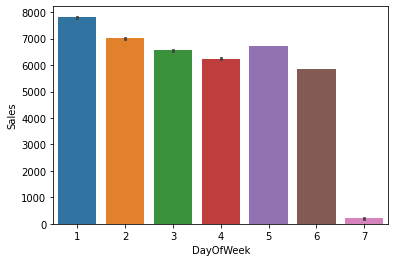

In [ ]:
# Relationship between Day of week and sales
sns.barplot(x='DayOfWeek',y='Sales', data=df)

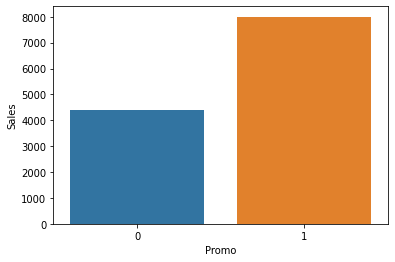

In [ ]:
## Relationship between Promo and sales
sns.barplot(x='Promo',y='Sales', data=df)

In [ ]:
# Getting the unique values in State Holiday
df['StateHoliday'].unique()


array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
# Replacing the "0"(string) with 0
df['StateHoliday'].replace({"0":0},inplace=True)


In [ ]:
# Checking
df['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

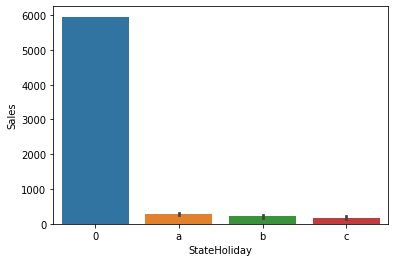

In [ ]:
### Relationship between Promo and sales
sns.barplot(x="StateHoliday",y="Sales",data=df)

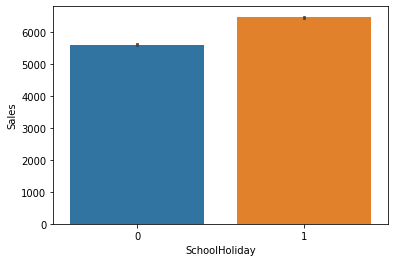

In [ ]:
#Relationship between SchoolHoliday and sales
sns.barplot(x="SchoolHoliday",y="Sales",data=df)

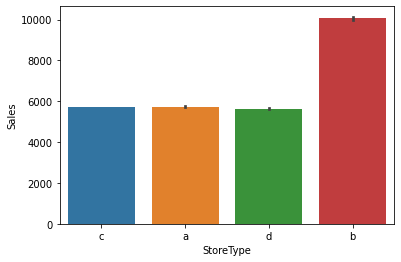

In [ ]:
#Relationship between StoreType and sales
sns.barplot(x="StoreType",y="Sales",data=df)

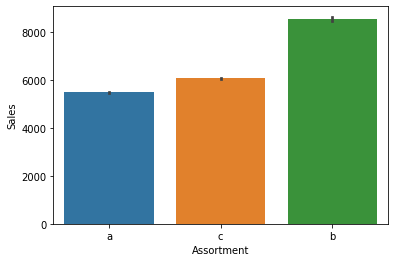

In [ ]:
#Relationship between Assortment and sales
sns.barplot(x="Assortment",y="Sales",data=df)

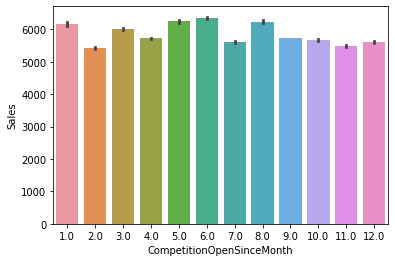

In [ ]:
#Relationship between CompetitionOpenSinceMonth and sales
sns.barplot(x="CompetitionOpenSinceMonth",y="Sales",data=df)

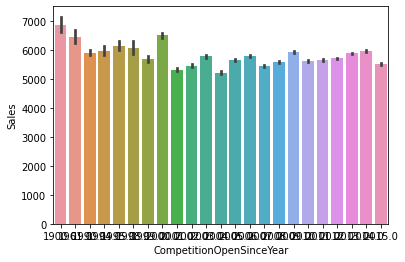

In [ ]:
#Relationship between CompetitionOpenSinceYear and sales
sns.barplot(x="CompetitionOpenSinceYear",y="Sales",data=df)


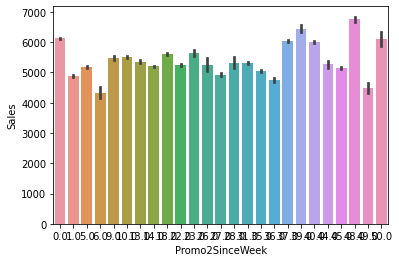

In [ ]:
#Relationship between Promo2SinceWeek and sales
sns.barplot(x="Promo2SinceWeek",y="Sales",data=df)

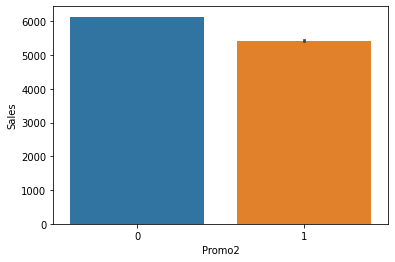

In [ ]:
#Relationship between Promo2 and sales
sns.barplot(x="Promo2",y="Sales",data=df)

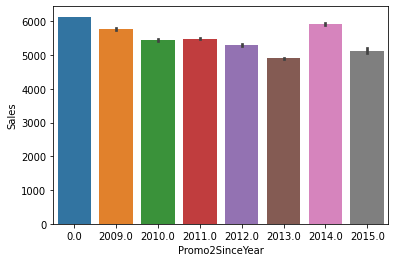

In [ ]:
#Relationship between Promo2SinceYear and sales
sns.barplot(x="Promo2SinceYear",y="Sales",data=df)


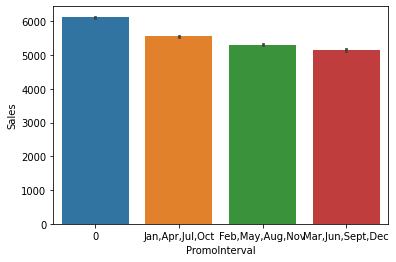

In [ ]:
#Relationship between PromoInterval and sales
sns.barplot(x="PromoInterval",y="Sales",data=df)


**Observations**


*   There were more sales on Monday, probably because shops generally remain closed on Sundays.

*   It could be seen that the Promo leads to more sales.

*   Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.


*   More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.


*   On an average Store type B had the highest sales.

*   Highest average sales were seen with Assortment levels-b which is 'extra'.


*   With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.






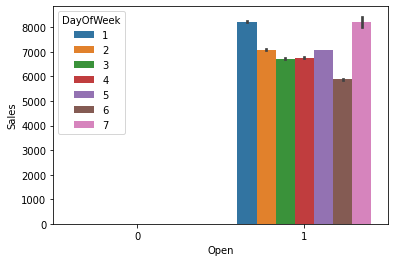

In [ ]:
# open and storetype relationship
#this indicates - Open suggests that weather the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])


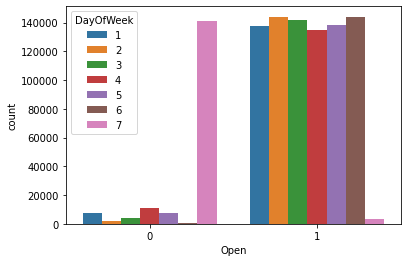

In [ ]:
#Lets see open, how many shops are open on which days
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])


 This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holiday

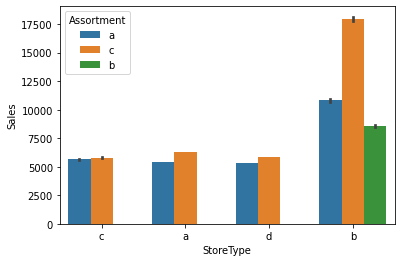

In [ ]:
# relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])


The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.



In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type


,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


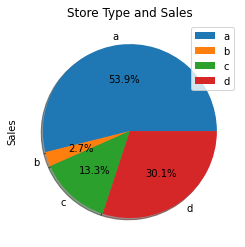

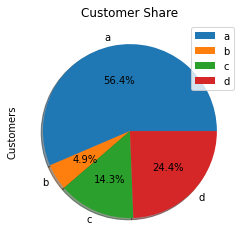

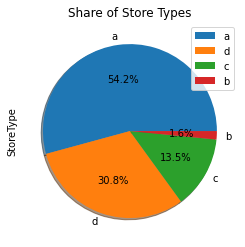

In [ ]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()


What we observe in the above



*   A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

*   But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.


*   Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

    These observatins will help for our predictions





In [ ]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()


#CONTINOUS FEATURES

Sales with Time

In [ ]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
610235,1,2,2013-12-31,2362,298,1,0,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2013,12,1,365
610236,2,2,2013-12-31,2148,268,1,0,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,12,1,365
610237,3,2,2013-12-31,4081,463,1,0,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,12,1,365
610238,4,2,2013-12-31,9813,1323,1,0,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2013,12,1,365
610239,5,2,2013-12-31,2009,241,1,0,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2013,12,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


In [ ]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()


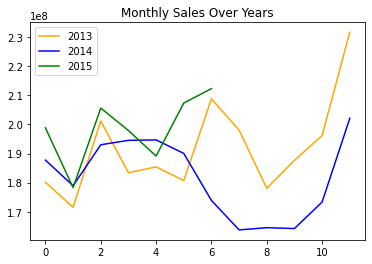

In [ ]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()


Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.



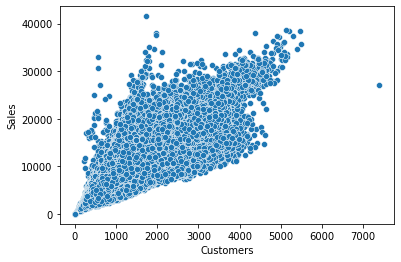

In [ ]:
sns.scatterplot(x="Customers",y="Sales",data=df)


Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.



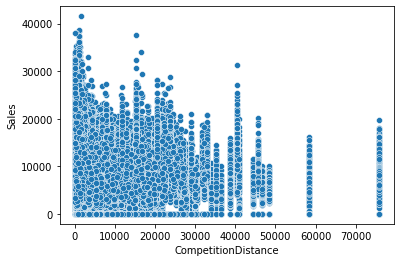

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])


From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.



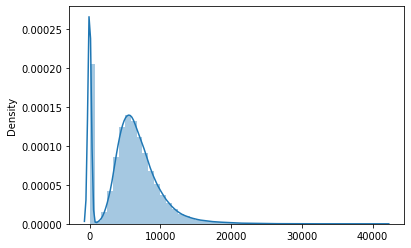

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])


The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

#Correlation Matrix

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.



In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


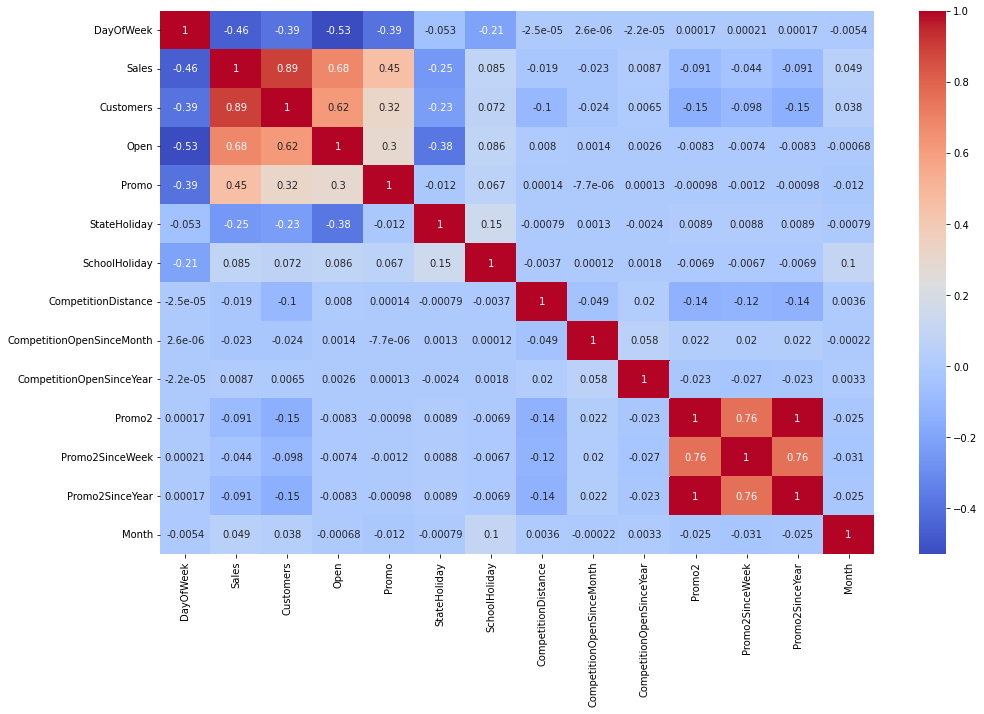

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)


**Obsrvations**


*   Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.


*   State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

*   CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.



*   There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.


*   The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.







EDA conclusions

*   There's a positive correlation between customers and sales which is explanatory.



*   Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week.



*   The positive effect of promotion on Customers and Sales is observable.



*   It is clear that most of the stores remain closed during State and School Holidays. But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.


*   Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.




*   Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.




*   When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.




*   Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.







#Feature Engineering



Feature engineering consists of creation, transformation, extraction, and selection of features, also known as variables, that are most conducive to creating an accurate ML algorithm.



In [ ]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape


(172817, 22)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.


In [ ]:
df[df.Open != 0]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)


In [ ]:
df1.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


In [ ]:
df1['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [ ]:
#changing into boolean
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)



In [ ]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)


In [ ]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [ ]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)


In [ ]:
df1.head()


DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

##Outlier Dtetection :

**Outliers and Z-score**

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation



Total number of Outliers present in the Sales column are 13443.


[Text(0.5, 1.0, 'Outliers Distribution')]

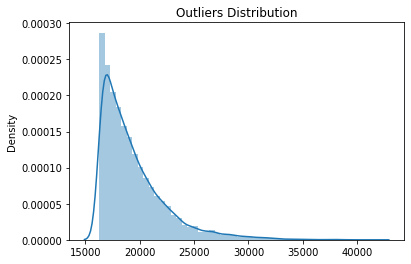

In [ ]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')


The data points with sales value higher than 28000 are very low and hence they can be considered as outliers. The percentage of outliers in our dataset



In [ ]:
#percentage of sales greater than 28000
sales_outliers = df1.loc[df1['Sales']>28000]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')


The percentage of observations of sales greater than 28000 are 0.03742337682024463


In [ ]:
#exploring the reasons behind this behaviour
sales_outliers.head()


,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,32263,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,28050,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,30667,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-02-03,262,7,28921,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-04,817,1,31649,4067,1,0,1,a,a,140.0,0,2013,2,6,35,83.0,0.0,0


In [ ]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]


,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,28921,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-03-03,262,7,29150,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-17,262,7,28221,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
2013-04-28,262,7,28026,4309,0,0,0,b,a,1180.0,0,2013,4,17,118,0.0,0.0,0
2013-05-12,262,7,29031,4638,0,0,0,b,a,1180.0,0,2013,5,19,132,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,28817,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,30255,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,32271,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


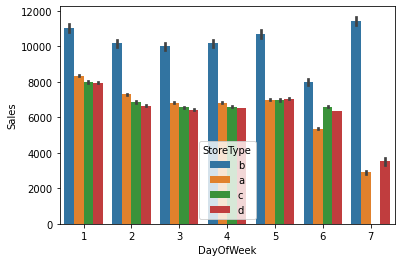

In [ ]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])


***Obsevrvations***



*   First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.


*   All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.


*   It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [ ]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]


DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-06 85             7  10509       1509      0             0   
           259            7   7926       1686      0             0   
           262            7  23240       3479      0             0   
           274            7   3802        932      0             0   
           335            7   7213       1310      0             0   
...                     ...    ...        ...    ...           ...   
2015-07-26 733            7  16172       3352      0             0   
           769            7  11075       2783      0             0   
           948            7  12040       2346      0             0   
           1081           7   5766        875      0             0   
           1097           7  13307       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

**Observations**


*   This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.


*   Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.


In [ ]:
#let's check if the sales value was 0 even when there was not a sunday, state or school holiday
df1.loc[(df1['Sales']==0) & (df1['StateHoliday']==0) & (df1['SchoolHoliday']==0) & (df1['SchoolHoliday'] != 7)].head()


,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-17,762,4,0,0,0,0,0,d,c,1280.0,1,2013,1,3,17,0.0,0.0,0
2013-01-24,232,4,0,0,1,0,0,c,c,13570.0,1,2013,1,4,24,32.0,0.0,0
2013-01-30,339,3,0,0,0,0,0,a,c,2280.0,1,2013,1,5,30,0.0,0.0,0
2013-01-31,339,4,0,0,0,0,0,a,c,2280.0,1,2013,1,5,31,0.0,0.0,0
2013-02-07,259,4,0,0,1,0,0,b,b,210.0,0,2013,2,6,38,0.0,0.0,0


In [ ]:
#these are some strange cases where no sales were recorded even when the stores should have been open
#even when many of them were promotion positive
df1.drop(df1.loc[(df1['Sales']==0) & (df1['StateHoliday']==0) & (df1['SchoolHoliday']==0) & (df1['SchoolHoliday'] != 7)].index,inplace=True)


In [ ]:
df1.shape


(844350, 17)

**Outlier treatmant**


*   It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.


*   The primary reasons for the behaviour are promotion and store type B.

*   If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.


##Feature Scaling

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df1

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   
...                     ...    ...        ...    ...           ...   
2015-07-31 1111           5   5723        422      1             0   
           1112           5   9626        767      1             0   
           1113           5   7289        720      1             0   
           1114           5  27508       3745      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-31 1111               1         a          a               1900.0   
           1112               1         c          c               1880.0   
           1113               1         a          c               9260.0   
           1114               1         a          c                870.0   
           1115               1         d          c               5350.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-31 1111        1  2015      7          31        212             13.0   
           1112        0  2015      7          31        212            111.0   
           1113        0  2015      7          31        212             22.0   
           1114        0  2015      7          31        212             22.0   
           1115        1  2015      7          31        212             22.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-31 1111    24.000000              1  
           1112     0.000000              0  
           1113     0.000000              0  
           1114     0.000000              0  
           1115    38.071233              0  

[844350 rows x 17 columns]

In [ ]:
#unscaled csv
cleaned_unscaled_data = df1.to_csv("/content/drive/MyDrive/Cleaned_Unscaled_data.csv")


In [ ]:
df2=df1.copy()


In [ ]:
df2

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   
...                     ...    ...        ...    ...           ...   
2015-07-31 1111           5   5723        422      1             0   
           1112           5   9626        767      1             0   
           1113           5   7289        720      1             0   
           1114           5  27508       3745      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-31 1111               1         a          a               1900.0   
           1112               1         c          c               1880.0   
           1113               1         a          c               9260.0   
           1114               1         a          c                870.0   
           1115               1         d          c               5350.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-31 1111        1  2015      7          31        212             13.0   
           1112        0  2015      7          31        212            111.0   
           1113        0  2015      7          31        212             22.0   
           1114        0  2015      7          31        212             22.0   
           1115        1  2015      7          31        212             22.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-31 1111    24.000000              1  
           1112     0.000000              0  
           1113     0.000000              0  
           1114     0.000000              0  
           1115    38.071233              0  

[844350 rows x 17 columns]

In [ ]:
#fitting numerical columns
numerical_cols = ['Customers','CompetitionDistance','Year','Month','WeekOfYear','DayOfYear','CompetitionOpen','Promo2Open','Sales']
scaler = MinMaxScaler()
scaler.fit(df2[numerical_cols])
df2[numerical_cols] = scaler.transform(df2[numerical_cols])


In [ ]:
df2.head()


DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  0.101562   0.083785      0             1   
           259            2  0.164882   0.195452      0             1   
           262            2  0.415562   0.389145      0             1   
           274            2  0.074655   0.098674      0             1   
           335            2  0.057784   0.065241      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a             0.024393   
           259                1         b          b             0.002505   
           262                1         b          a             0.015295   
           274                1         b          b             0.047732   
           335                1         b          a             0.000923   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0   0.0    0.0         0.0        0.0         0.010823   
           259         0   0.0    0.0         0.0        0.0         0.000000   
           262         0   0.0    0.0         0.0        0.0         0.000000   
           274         1   0.0    0.0         0.0        0.0         0.000000   
           335         1   0.0    0.0         0.0        0.0         0.000000   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

##Catagorical Feature Encoding

In [ ]:
#importing
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']


In [ ]:
#fit encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(df2[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
df2[encoded_features] = encoder.transform(df2[categorical_cols])


In [ ]:
df2.head()


DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  0.101562   0.083785      0             1   
           259            2  0.164882   0.195452      0             1   
           262            2  0.415562   0.389145      0             1   
           274            2  0.074655   0.098674      0             1   
           335            2  0.057784   0.065241      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a             0.024393   
           259                1         b          b             0.002505   
           262                1         b          a             0.015295   
           274                1         b          b             0.047732   
           335                1         b          a             0.000923   

                  Promo2  ...  DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  \
Date       Store          ...                                          
2013-01-01 85          0  ...          0.0          0.0          0.0   
           259         0  ...          0.0          0.0          0.0   
           262         0  ...          0.0          0.0          0.0   
           274         1  ...          0.0          0.0          0.0   
           335         1  ...          0.0          0.0          0.0   

                  StoreType_a  StoreType_b  StoreType_c  StoreType_d  \
Date       Store                                                       
2013-01-01 85             0.0          1.0          0.0          0.0   
           259            0.0          1.0          0.0          0.0   
           262            0.0          1.0          0.0          0.0   
           274            0.0          1.0          0.0          0.0   
           335            0.0          1.0          0.0          0.0   

                  Assortment_a  Assortment_b  Assortment_c  
Date       Store                                            
2013-01-01 85              1.0           0.0           0.0  
           259             0.0           1.0           0.0  
           262             1.0           0.0           0.0  
           274             0.0           1.0           0.0  
           335             1.0           0.0           0.0  

[5 rows x 31 columns]

In [ ]:
#drop columns
df2.drop(categorical_cols,axis=1,inplace=True)


In [ ]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]


In [ ]:
#check
df2.head(1)



,,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,...,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Sales
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-01-01,85,0.083785,0,1,1,0.024393,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.101562


##Modeling

Factors affecting in choosing the model:

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data.



Train - Test split

In [ ]:
df2.head()


Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                  
2013-01-01 85      0.083785      0             1              1   
           259     0.195452      0             1              1   
           262     0.389145      0             1              1   
           274     0.098674      0             1              1   
           335     0.065241      0             1              1   

                  CompetitionDistance  Promo2  Year  Month  WeekOfYear  \
Date       Store                                                         
2013-01-01 85                0.024393       0   0.0    0.0         0.0   
           259               0.002505       0   0.0    0.0         0.0   
           262               0.015295       0   0.0    0.0         0.0   
           274               0.047732       1   0.0    0.0         0.0   
           335               0.000923       1   0.0    0.0         0.0   

                  DayOfYear  ...  DayOfWeek_6  DayOfWeek_7  StoreType_a  \
Date       Store             ...                                          
2013-01-01 85           0.0  ...          0.0          0.0          0.0   
           259          0.0  ...          0.0          0.0          0.0   
           262          0.0  ...          0.0          0.0          0.0   
           274          0.0  ...          0.0          0.0          0.0   
           335          0.0  ...          0.0          0.0          0.0   

                  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
Date       Store                                                        
2013-01-01 85             1.0          0.0          0.0           1.0   
           259            1.0          0.0          0.0           0.0   
           262            1.0          0.0          0.0           1.0   
           274            1.0          0.0          0.0           0.0   
           335            1.0          0.0          0.0           1.0   

                  Assortment_b  Assortment_c     Sales  
Date       Store                                        
2013-01-01 85              0.0           0.0  0.101562  
           259             1.0           0.0  0.164882  
           262             0.0           0.0  0.415562  
           274             1.0           0.0  0.074655  
           335             0.0           0.0  0.057784  

[5 rows x 28 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 844350 entries, (Timestamp('2013-01-01 00:00:00'), 85) to (Timestamp('2015-07-31 00:00:00'), 1115)
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customers            844350 non-null  float64
 1   Promo                844350 non-null  int64  
 2   StateHoliday         844350 non-null  int64  
 3   SchoolHoliday        844350 non-null  int64  
 4   CompetitionDistance  844350 non-null  float64
 5   Promo2               844350 non-null  int64  
 6   Year                 844350 non-null  float64
 7   Month                844350 non-null  float64
 8   WeekOfYear           844350 non-null  float64
 9   DayOfYear            844350 non-null  float64
 10  CompetitionOpen      844350 non-null  float64
 11  Promo2Open           844350 non-null  float64
 12  Promo2running        844350 non-null  int64  
 13  DayOfWeek_1          844350 non-null  float64
 1

In [ ]:
df2.tail()


Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                  
2015-07-31 1111    0.057120      1             0              1   
           1112    0.103817      1             0              1   
           1113    0.097455      1             0              1   
           1114    0.506903      1             0              1   
           1115    0.072821      1             0              1   

                  CompetitionDistance  Promo2  Year     Month  WeekOfYear  \
Date       Store                                                            
2015-07-31 1111              0.024789       1   1.0  0.545455    0.588235   
           1112              0.024525       0   1.0  0.545455    0.588235   
           1113              0.121835       0   1.0  0.545455    0.588235   
           1114              0.011208       0   1.0  0.545455    0.588235   
           1115              0.070280       1   1.0  0.545455    0.588235   

                  DayOfYear  ...  DayOfWeek_6  DayOfWeek_7  StoreType_a  \
Date       Store             ...                                          
2015-07-31 1111     0.57967  ...          0.0          0.0          1.0   
           1112     0.57967  ...          0.0          0.0          0.0   
           1113     0.57967  ...          0.0          0.0          1.0   
           1114     0.57967  ...          0.0          0.0          1.0   
           1115     0.57967  ...          0.0          0.0          0.0   

                  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
Date       Store                                                        
2015-07-31 1111           0.0          0.0          0.0           1.0   
           1112           0.0          1.0          0.0           0.0   
           1113           0.0          0.0          0.0           0.0   
           1114           0.0          0.0          0.0           0.0   
           1115           0.0          0.0          1.0           0.0   

                  Assortment_b  Assortment_c     Sales  
Date       Store                                        
2015-07-31 1111            0.0           0.0  0.137734  
           1112            0.0           1.0  0.231667  
           1113            0.0           1.0  0.175423  
           1114            0.0           1.0  0.662030  
           1115            0.0           1.0  0.208900  

[5 rows x 28 columns]

In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]


In [ ]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of X_train is: (798498, 27)
The shape of y_train is: (798498, 1)
The shape of X_test is: (45852, 27)
The shape of y_test is: (45852, 1)


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


In [ ]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results '''
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing train results
  print(f'The MAE for the Training set is {MAE_train}')
  print(f'The MSE for the Training set is {MSE_train}')
  print(f'The RMSE for the Training set is {RMSE_train}')
  print(f'The R2 for the Training set is {R2_train}')
  print(f'The Adjusted R2 for the Training set is {Adj_r2_train}')
  print("--------------------------")
  print(f'The MAE for the validation set is {MAE_test}')
  print(f'The MSE for the validation set is {MSE_test}')
  print(f'The RMSE for the validation set is {RMSE_test}')
  print(f'The R2 for the validation set is {R2_test}')
  print(f'The Adjusted R2 for the validation set is {Adj_r2_test}')

    #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]


In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparisons_df
  comparisons_df = pd.DataFrame(final_list, columns= comparison_columns)


The MAE for the Training set is 0.022316
The MSE for the Training set is 0.000933
The RMSE for the Training set is 0.030543
The R2 for the Training set is 0.832881
The Adjusted R2 for the Training set is 0.832876
--------------------------
The MAE for the validation set is 0.02314
The MSE for the validation set is 0.001034
The RMSE for the validation set is 0.03216
The R2 for the validation set is 0.812882
The Adjusted R2 for the validation set is 0.812772


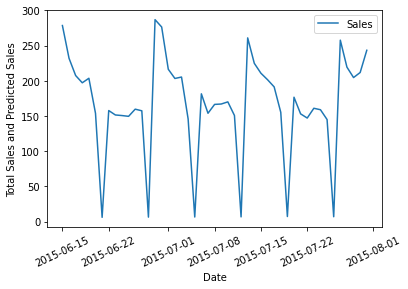

In [ ]:
LinearRegression = model_evaluation('LinearRegression',reg,X_train,y_train,X_test,y_test)


In [ ]:
#add results to comparison df
add_list_to_final_df(LinearRegression)


In [ ]:
comparisons_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022316,0.000933,0.030543,0.832881,0.832876,0.02314,0.001034,0.03216,0.812882,0.812772


**Observations**

In Linear Regression R2 score and adjusted R2 score is very less. So we need to move further models like Decision Tree.


##Decission Tree

The MAE for the Training set is 0.0
The MSE for the Training set is 0.0
The RMSE for the Training set is 4.7e-05
The R2 for the Training set is 1.0
The Adjusted R2 for the Training set is 1.0
--------------------------
The MAE for the validation set is 0.014203
The MSE for the validation set is 0.000466
The RMSE for the validation set is 0.02158
The R2 for the validation set is 0.91575
The Adjusted R2 for the validation set is 0.9157


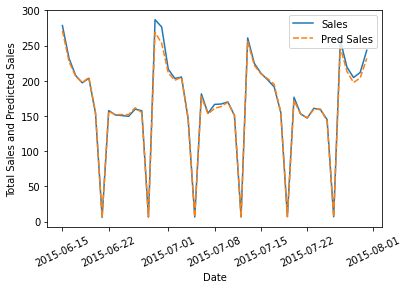

In [ ]:
#Importing libraries
from sklearn.tree import DecisionTreeRegressor
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)


In [ ]:
#add results to comparison df
add_list_to_final_df(decision_tree)


In [ ]:
comparisons_df


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022316,0.000933,0.030543,0.832881,0.832876,0.023140,0.001034,0.03216,0.812882,0.812772
1,Decision Tree Regressor,0.000000,0.000000,0.000047,1.000000,1.000000,0.014203,0.000466,0.02158,0.915750,0.915700


**Observations**

 The Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points. By using hyper parameter tuning we can solve this issue.


##Random Forest

In [ ]:
#importing
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#fitting
random_forest = RandomForestRegressor(n_estimators=50,random_state=42)
random_forest.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

The MAE for the Training set is 0.003097
The MSE for the Training set is 2.3e-05
The RMSE for the Training set is 0.004764
The R2 for the Training set is 0.995934
The Adjusted R2 for the Training set is 0.995934
--------------------------
The MAE for the validation set is 0.010375
The MSE for the validation set is 0.000247
The RMSE for the validation set is 0.015705
The R2 for the validation set is 0.955376
The Adjusted R2 for the validation set is 0.95535


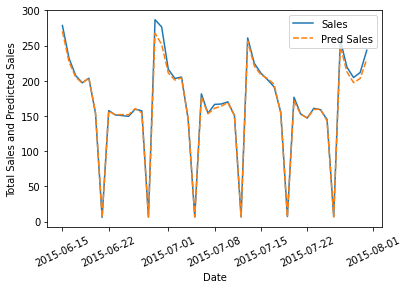

In [ ]:
#model evaluation
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)


In [ ]:
#add results to comparison df
add_list_to_final_df(random_f)


In [ ]:
comparisons_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022316,0.000933,0.030543,0.832881,0.832876,0.023140,0.001034,0.032160,0.812882,0.812772
1,Decision Tree Regressor,0.000000,0.000000,0.000047,1.000000,1.000000,0.014203,0.000466,0.021580,0.915750,0.915700
2,Random Forest Regressor,0.003097,0.000023,0.004764,0.995934,0.995934,0.010375,0.000247,0.015705,0.955376,0.955350


In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())


Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Observations**

Random Forest Regressor results were much better than Linear Regression and Desicion Tree. Next we'll try to tune the hyperparameters and check the results



In [ ]:
#creating a csv file for the cleaned dataset
# Rossmann sales prediction to be continued in the next notebook
cleaned_data = df2.to_csv("/content/drive/MyDrive/Cleaned_Unscaled_data.csv")
#creating a csv file for the comparison dataframe
results = comparisons_df.to_csv("/content/drive/MyDrive/results.csv")
